![new-logo-32.png](attachment:new-logo-32.png)

In [2]:
%%capture
!pip install shap

<hr>
<p style="font-size:40px;text-align:center">Take Home - Data Science</p>
<hr>

# The Hotel Bookings Data
Let’s use hotel bookings data from [Antonio, Almeida, and Nunes (2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191?via%3Dihub) to predict which hotel stays included children and/or babies, based on the other characteristics of the stays such as which hotel the guests stay at, how much they pay, etc.

<img src="https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/header.png"/>

One of the hotels (H1) is a resort hotel and the other is a city hotel (H2). Both datasets share the same structure, with 23 variables describing the 19248 observations of H1 and 30752 observations of H2. Each observation represents a hotel booking. Both datasets comprehend bookings due to arrive between the 1st of July of 2015 and the 31st of August 2017, including bookings that effectively arrived and bookings that were canceled. Since this is hotel real data, all data elements pertaining hotel or custumer identification were deleted.

**Take-Home Goals**

#### Part 1
During **Part I**, you should perform an Exploratory Data Analysis highlighting key findings:
  - Data Quality Check: You must check the quality of the given dataset to make an assessment of how appropriate it is for later Data Science tasks. Propose a set of corrective actions over the data if any.
  - Report insights and conclusions: Describe the results obtained during the exploratory analysis and provide conclusions from a business perspective, supported by plots / tables / metrics.
  - **Expected**:
    - Make at least 10 plots with any ploting library (plotly, matplotlib, seaborn, etc.)
    - Write down the conclusions, in a clear manner, of every plot in this notebook

#### Part 2
In **Part II** you should define and train a model to predict which actual hotel stays included children/babies, and which did not:
  - **Feature extraction:** Indicate some possible candidates of features that could properly describe the hotels, either from the given columns or from their transformations.
      - **Expected**:
        - Create **one** scikit-learn pipeline inside a file called `pipelines.py`
        - Create at least **three** scikit-learn transformers inside a file called `transformers.py` and use them inside the pipeline from previous step. This transformers should add new features or clean the original dataframe of this take-home
          - Feature example: Compute "total_nights" feature. This is the sum of `stays_in_week_nights` + `stays_in_weekend_nights`
          - Cleaning example: Transform string values. `'0'` to int type `0`
        - Import pipeline and run the transformations inside this notebook

  - **Machine Learning modeling:** Fit models with the given data. Pay attention to the entire process to avoid missing any crucial step. You could use the `children` column as target.
    - **Expected**:
      - Use the dataset with the new features generated to train *at least* **three** different machine learning models and generate metrics about their performance.
    
#### Part 3
Finally, on **Part III** you should present the key findings, conclusions and results to non-technical stakeholders.
  - **Expected**:
    - Create a summary of all the findings in part 1
    - Create an explanation of the features added in part 2
    - Create a summary of the model metrics
    - These explanations should be at high level and understood by a non-technical person
    - You can add all the summaries and explanations at the end of this notebook, it can be done in markdown format or any other external resource like a ppt presentation, pdf document, etc. Whatever works best for you!


**Requirements**
- Python 3.x & Pandas 1.x
- Paying attention to the details and narrative is far way more important than extensive development.
- Once you complete the assessment, please send a ZIP file of the folder with all the resources used in this work (e.g. Jupyter notebook, Python scripts, text files, images, etc) or share the repository link.
- Virtualenv, requirements or Conda environment for isolation.
- Have a final meeting with the team to discuss the work done in this notebook and answer the questions that could arise.
- Finally, but most important: Have fun!

**Nice to have aspects**
- Code versioning with Git (you are free to publish it on your own Github/Bitbucket account!).
- Show proficiency in Python: By showing good practices in the structure and documentation, usage of several programming paradigms (e.g. imperative, OOP, functional), etc.
- Shap Model explanability: explain feature importance with the use of shapley values

### IMPORT LIBRARIES AND DATA

In [18]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import shap
import matplotlib.pyplot as plt

from data_cleaning_transformers import DataCleaningAndTransformation
from feature_engineering import FeatureEngineering
from preprocessing import apply_smote
from feature_importance import FeatureImportanceAnalysis
from eda import EDA

import warnings
warnings.filterwarnings('ignore')

hotels = pd.read_csv('https://s3-us-west-2.amazonaws.com/fligoo.data-science/TechInterviews/HotelBookings/hotels.csv')

## Part I - Exploratory Data Analisys

### Data Cleaning and Transformation


---
Class: DataCleaningAndTransformation

Why this section is important:

Data cleaning and transformation are critical steps before performing any exploratory data analysis (EDA) or modeling. Clean and well-structured data ensures that the insights derived are accurate and meaningful. This section focuses on transforming specific columns to appropriate formats, handling missing values, and converting categorical variables into numerical formats for better analysis and modeling.

Explanation of the code:

- Initialization: The DataCleaningAndTransformation class is initialized with a dataframe. This prepares the class to perform various data cleaning and transformation tasks.
- Transform children Column: The transform_children method converts the children column to a binary format where ‘none’ is replaced with 0 and ‘children’ is replaced with 1. This simplifies the analysis and modeling by standardizing the representation of the presence of children.
- Move children Column: The move_children_column method moves the children column to the beginning of the dataframe (after the index). This makes the column more accessible for analysis.
- Transform arrival_date Column: The transform_arrival_date method extracts the month from the arrival_date column to create a new column arrival_month. This allows analysis of booking patterns based on the time of year. The original arrival_date column is then dropped.
- Transform required_car_parking_spaces Column: The transform_parking_spaces method converts the required_car_parking_spaces column to a binary format where ‘none’ is replaced with 0 and ‘parking’ is replaced with 1. This standardizes the representation of parking space requirements.
- Handle Missing Values in country: The handle_missing_country method removes rows with missing values in the country column. This ensures that only complete records are used in the analysis.
- Apply Label Encoding: The apply_label_encoding method converts categorical columns into numerical format using label encoding. This is essential for modeling, as many algorithms require numerical input.
- Execute All Transformations: The apply_all_transformations method runs all the above transformations sequentially, ensuring a comprehensive cleaning and transformation of the data.

In [4]:
# Aplicar Data Cleaning y Transformaciones
data_cleaner = DataCleaningAndTransformation(hotels)
hotels_cleaned = data_cleaner.apply_all_transformations()

/content/data_cleaning_transformers.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df['arrival_month'] = pd.to_datetime(self.df['arrival_date']).dt.month


In [5]:
hotels_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49711 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           49711 non-null  int64  
 1   children                        49711 non-null  int64  
 2   lead_time                       49711 non-null  int64  
 3   stays_in_weekend_nights         49711 non-null  int64  
 4   stays_in_week_nights            49711 non-null  int64  
 5   adults                          49711 non-null  int64  
 6   meal                            49711 non-null  int64  
 7   country                         49711 non-null  int64  
 8   market_segment                  49711 non-null  int64  
 9   distribution_channel            49711 non-null  int64  
 10  is_repeated_guest               49711 non-null  int64  
 11  previous_cancellations          49711 non-null  int64  
 12  previous_bookings_not_canceled  49711

In [6]:
hotels_cleaned.head()

,hotel,children,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_month
0,0,0,217,1,3,2,0,39,5,3,...,0,0,0,0,0,3,80.75,0,1,9
1,0,0,2,0,1,2,0,118,3,1,...,3,9,0,0,0,2,170.00,0,3,8
2,1,0,95,2,5,2,0,53,6,3,...,0,0,2,0,0,2,8.00,0,2,11
3,1,0,143,2,6,2,2,122,6,3,...,0,0,0,0,0,2,81.00,0,1,4
4,1,0,136,1,4,2,2,118,3,1,...,5,5,0,0,0,2,157.60,0,4,12


### Feature Engineering


---
Class: FeatureEngineering

Why this section is important:

Feature engineering is the process of creating new features or transforming existing ones to improve the performance of machine learning models. Good feature engineering can significantly enhance the predictive power of models by providing them with more relevant and insightful data.

Explanation of the code:

- Initialization: The FeatureEngineering class is initialized with a dataframe. This prepares the class to perform various feature engineering tasks.
- Create total_nights Feature: The create_total_nights method creates a new column total_nights which is the sum of stays_in_week_nights and stays_in_weekend_nights. This feature represents the total number of nights a guest stayed.
- Create is_weekend_stay Feature: The create_is_weekend_stay method creates a new column is_weekend_stay which indicates if the stay included weekend nights. This is a binary feature indicating the presence of weekend stays.
- Apply All Feature Engineering: The apply_all_features method runs all the above feature engineering tasks sequentially, ensuring a comprehensive transformation of the data.



In [7]:
# Aplicar Feature Engineering
feature_engineer = FeatureEngineering(hotels_cleaned)
hotels_featured = feature_engineer.apply_all()

In [8]:
# Verificar los tipos de datos y valores nulos después de la limpieza, transformación y creación de características
hotels_featured.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49711 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           49711 non-null  int64  
 1   children                        49711 non-null  int64  
 2   lead_time                       49711 non-null  int64  
 3   stays_in_weekend_nights         49711 non-null  int64  
 4   stays_in_week_nights            49711 non-null  int64  
 5   adults                          49711 non-null  int64  
 6   meal                            49711 non-null  int64  
 7   country                         49711 non-null  int64  
 8   market_segment                  49711 non-null  int64  
 9   distribution_channel            49711 non-null  int64  
 10  is_repeated_guest               49711 non-null  int64  
 11  previous_cancellations          49711 non-null  int64  
 12  previous_bookings_not_canceled  49711

In [9]:
# Mostrar las primeras filas después de la limpieza, transformación y creación de características
hotels_featured.head()

,hotel,children,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,arrival_month,total_nights,is_weekend_stay
0,0,0,217,1,3,2,0,39,5,3,...,0,0,0,3,80.75,0,1,9,4,1
1,0,0,2,0,1,2,0,118,3,1,...,0,0,0,2,170.00,0,3,8,1,0
2,1,0,95,2,5,2,0,53,6,3,...,2,0,0,2,8.00,0,2,11,7,1
3,1,0,143,2,6,2,2,122,6,3,...,0,0,0,2,81.00,0,1,4,8,1
4,1,0,136,1,4,2,2,118,3,1,...,0,0,0,2,157.60,0,4,12,5,1


### Exploratory Data Analysis


---
Class: EDA

Why this section is important:

Exploratory Data Analysis (EDA) is a fundamental step in any data science project. It helps us understand the data’s structure, identify patterns, spot anomalies, and test hypotheses. This process is crucial for making informed decisions about feature engineering and model selection later on.

Explanation of the code:

- Initialization: The EDA class is initialized with a dataframe and optionally, label encoders. This class contains various methods to create insightful visualizations.
- Plot Distribution by Hotel: The plot_distribution_by_hotel method generates a histogram showing the distribution of reservations by hotel type. This helps understand the balance between different hotel types in the dataset.
- Plot Previous Cancellations: The plot_previous_cancellations method creates a histogram to visualize the number of previous cancellations. This is useful for analyzing cancellation patterns.
- Plot Price Distribution: The plot_price_distribution method generates a box plot to show the distribution of average daily rates across different hotel types. This helps in understanding pricing patterns.
- Plot Stays Distribution: the plot_stays_distribution method creates box plots to show the distribution of weekend and weekday stays. This provides insights into guest booking behaviors.
- Plot Children Distribution: The plot_children_distribution method generates a histogram showing the distribution of reservations with children. This is directly related to the problem we’re trying to solve.
- Plot Seasonality: The plot_seasonality method creates a histogram to visualize the seasonality of reservations. This helps in identifying peak booking periods.
- Plot Market Segment: The plot_market_segment method generates a histogram showing the distribution of reservations by market segment. This provides insights into the customer base.
- Plot Cancellation Total by Customer Type: The plot_cancellation_rate_by_customer_type method creates a bar chart to show the cancellations for different customer types. This helps in understanding the behavior of different customer segments.
- Plot Average Stay Duration: The plot_average_stay_duration method generates a bar chart showing the average stay duration by hotel type.This provides insights into the length of stays.
- Plot Meal Distribution: the plot_meal_distribution method creates a histogram showing the distribution of meal types booked, this helps in understanding the preferences of guests.
- Apply All EDA: the apply_all_eda method runs all EDA tasks sequentially, ensuring a comprehensive exploration of the data.

In [10]:
# Realizar el Análisis Exploratorio de Datos
eda = EDA(hotels_featured)
eda.apply_all_eda()

Additional Ideas for EDA


---



1.	Age Distribution:
- Create a histogram or bar chart to show the age distribution of guests (if age information is available).
2.	Correlation between Variables:
- Develop a heatmap to display the correlation matrix between all numerical variables. This can help identify strong relationships between different variables.
3.	Stay Duration vs. Average Daily Rate:
- Plot a scatter plot to show the relationship between the total stay duration (total_nights) and the average daily rate (average_daily_rate). This can reveal patterns in how pricing varies with the length of stay.
4.	Monthly Revenue Analysis:
- Use a line chart to show total revenue by month. This can be calculated using arrival_month and summing up average_daily_rate * total_nights. This helps in understanding seasonal revenue trends.
5.	Guest Segmentation by Country:
- Create a bar chart to show the distribution of guests by country (country). This provides insights into the geographic demographics of the customer base.
6.	Booking Changes vs. Cancellation Rate:
- Develop a plot to show the relationship between the number of booking changes (booking_changes) and the cancellation rate (is_canceled). This can highlight whether frequent changes are associated with higher cancellation rates.
7.	Room Type vs. Cancellation Rate:
- Create a bar chart to show the cancellation rate for each reserved room type (reserved_room_type). This can help identify if certain room types have higher cancellation rates.
8.	Meal Plan Preferences:
- Develop a bar chart to compare the popularity of different meal plans (meal) among guests. This can provide insights into guest preferences regarding meal options.
9.	Lead Time Distribution:
- Create a histogram to show the distribution of lead time (lead_time). This helps in understanding how far in advance guests typically book their stays.
10.	Analysis of Repeat Guests:
- Develop a plot to compare the cancellation rate between repeat guests (is_repeated_guest) and new guests. This can reveal differences in behavior between new and returning customers.

These additional EDA ideas can provide a deeper understanding of the dataset and uncover valuable insights that might not be immediately obvious.

### Some EDA conclusions!


---
The primary objective of our EDA is to understand the distribution of our variables while detecting outliers or anomalies in the data from a broader perspective without delving deeply into each variable. This allows us to gain a general overview of the information we will incorporate into our model. Here are some specific observations and alerts:

1.	Class Imbalance in Target Variable:
- Our target variable ‘children’ shows a class imbalance, with significantly fewer instances of reservations including children. To address this, we need to apply a resampling technique. I prefer using oversampling techniques like SMOTE to avoid losing data from the original sample.
2.	Hotel Distribution:
-	The distribution between hotels shows a majority of bookings in the Resort Hotel (labeled as hotel 0). This can influence our model, and it’s important to keep this imbalance in mind during modeling.
3. Price Distribution:
- The price distribution shows that the second hotel (city hotel) has a lower median price compared to the first hotel (resort hotel). This might be due to the characteristics and amenities of the hotels, with the resort hotel possibly being of higher category.
4.	Stay Duration Distribution:
- The distribution of stays in weekdays and weekends differs slightly between hotels. This can provide insights into guest booking behaviors and preferences.
5.	Seasonality:
- The data indicates an increase in bookings during the central months of the year, particularly from June to August. However, I believe that the overall level of bookings remains relatively stable throughout the year based on this sample.
6.	Market Segment and Meal Plan Preferences:
-The remaining charts offer similar insights, showing bookings by customer type, the types of meals requested, etc. These distributions help us understand the preferences and behaviors of our guests better.




## Part II - Modeling

We will build the best model to predict which actual hotel stays included children/babies, and which did not:

### Preprocessing


---
Class: Preprocessing

Why this section is important:

Balancing the classes in a dataset is crucial for building a robust and fair model. When one class is underrepresented, the model might not learn to predict it correctly. Using techniques like SMOTE (Synthetic Minority Over-sampling Technique) helps to balance the classes by creating synthetic samples for the minority class.

Explanation of the Code:

- Initialization:
- The Preprocessing class is initialized with the dataframe and the target column.
- SMOTE Application:
- The apply_smote method applies SMOTE to the dataset to balance the classes.
- It splits the data into training and test sets, applies SMOTE to the training set, and then returns the balanced training data along with the test data.



In [11]:
y = hotels_featured['children']
X = hotels_featured.drop(columns=['children'])
X_train_balanced, X_test, y_train_balanced, y_test = apply_smote(X, y)

### Feature Importances Analysis
---



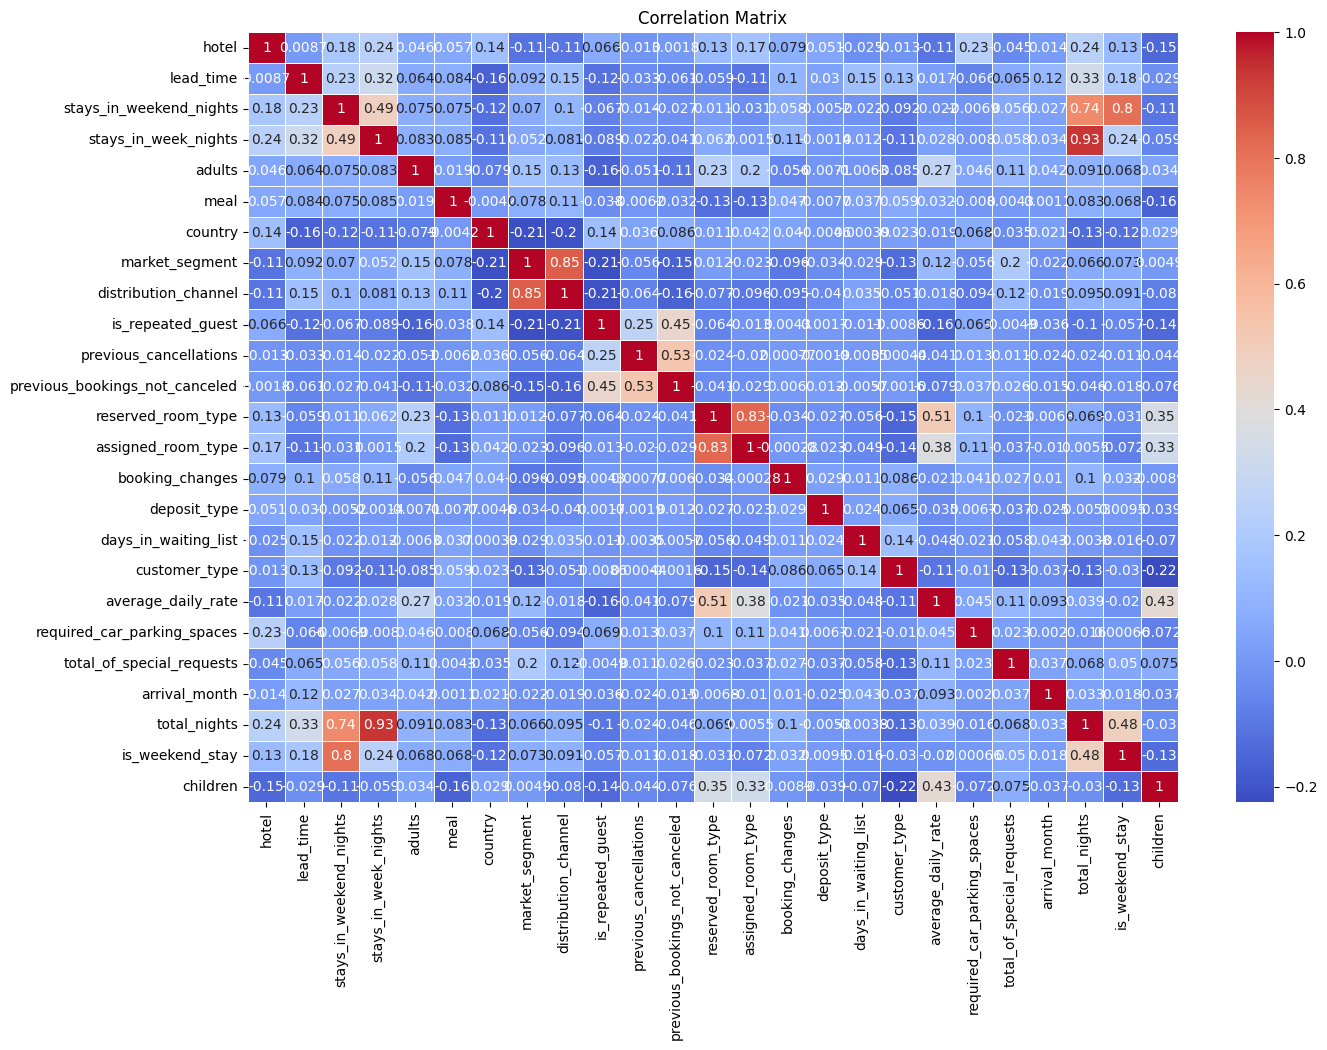

In [12]:
feature_importance_analyzer = FeatureImportanceAnalysis(X_train_balanced, y_train_balanced, X_test, y_test)
feature_importance_analyzer.plot_correlation_matrix()

In [13]:
feature_importance_df = feature_importance_analyzer.get_feature_importances()
feature_importance_df

,Feature,Importance
18,average_daily_rate,0.184882
12,reserved_room_type,0.107082
13,assigned_room_type,0.104048
17,customer_type,0.073539
1,lead_time,0.073331
21,arrival_month,0.055383
6,country,0.053135
4,adults,0.051017
5,meal,0.045385
7,market_segment,0.035535


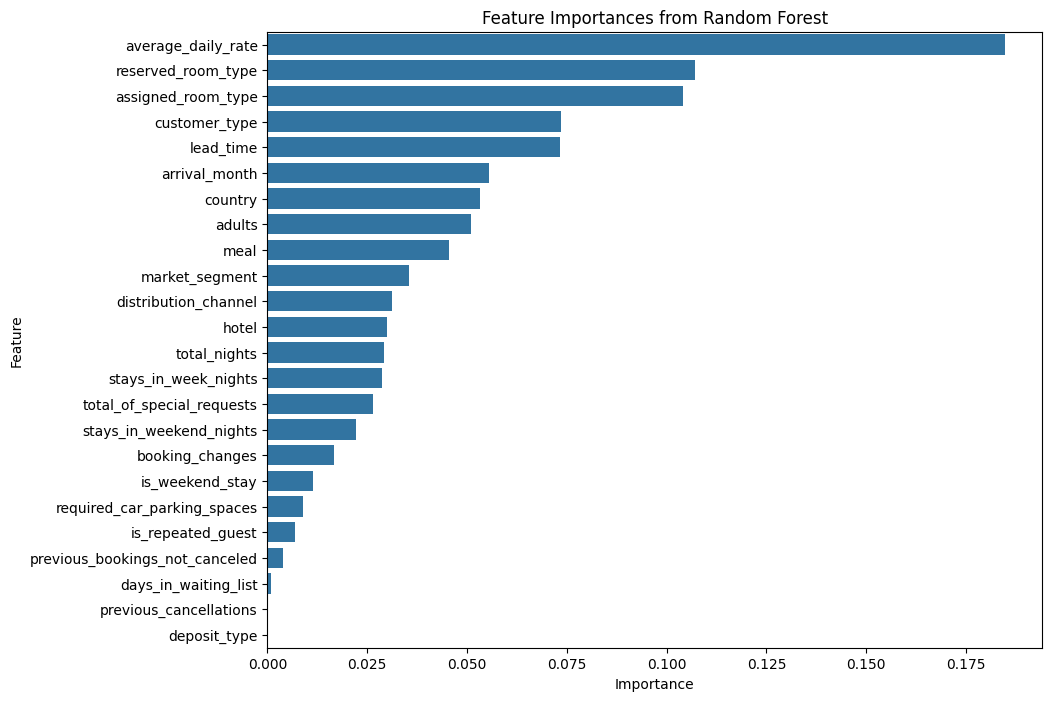

In [14]:
feature_importance_analyzer.plot_feature_importances(feature_importance_df)

### Explanation for Feature Selection Criteria


---


In any data science project, selecting the most relevant features is a crucial step. After performing feature importance analysis using a Random Forest Classifier, several criteria can be applied to select the most significant features:

- Importance Threshold:

This method involves selecting features whose importance scores exceed a certain threshold. For example, we might choose a threshold of 0.05, meaning only features with an importance score greater than 0.05 will be included in the final model.

- Fixed Number of Features:

Here, we select a fixed number of top features based on their importance scores. For instance, we might decide to keep the top 10 most important features regardless of their individual importance values.

- Cross-Validation Analysis:

This method involves performing cross-validation with different subsets of features and selecting the subset that maximizes the model's performance. It is more computationally intensive but can provide a robust set of features.

- Manual Evaluation:

In addition to automated methods, manual evaluation based on domain knowledge can be applied. Some features might be less important in the importance analysis but crucial from a business or domain perspective.

Recursive Feature Elimination (RFE):

This technique recursively removes the least important features and builds the model until the optimal set of features is reached. RFE aims to select features by recursively considering smaller and smaller sets of features. At each step, it ranks the features based on their importance and eliminates the least significant ones.



---



For simplicity, in this analysis, we will use the Importance Threshold technique. We will select features that have an importance score above 0.05 based on our feature importance analysis. This approach helps streamline our feature set while retaining the most impactful variables for our predictive model.

Implementing the Importance Threshold Technique
Based on our Random Forest feature importance analysis, the following features have been selected for our model as they have an importance score above 0.05:

- average_daily_rate (0.184882)
- reserved_room_type (0.107082)
- assigned_room_type (0.104048)
- customer_type (0.073539)
- lead_time (0.073331)
- arrival_month (0.055383)
- country (0.053135)
- adults (0.051017)

These features will be used to build our final model, ensuring it is both effective and interpretable.

This explanation provides a clear understanding of the criteria applied for feature selection and justifies the choice of the Importance Threshold technique for its simplicity and effectiveness.

### Machine Learning Modeling


---



Why this section is important:

Training and evaluating different machine learning models is essential to identify the best-performing model for our task. By using SHAP values, we can explain and understand the predictions of each model, ensuring transparency and trust in the model's decisions.

Explanation of the code:

1. Load and Preprocess Data:

- The data is loaded and preprocessed using the DataCleaningAndTransformation and FeatureEngineering classes. SMOTE is applied to balance the target classes.

2. Train and Evaluate Models:

- Three different models (Random Forest, Logistic Regression, and Gradient Boosting) are defined and trained on the balanced training set.
Each model is evaluated on the test set, and performance metrics (accuracy, precision, recall, and F1-score) are printed.

3. Apply SHAP for Explainability:

- The SHAPExplainer class is defined to handle the creation of SHAP explainer objects, calculation of SHAP values, and generation of SHAP plots.
For each model, SHAP values are calculated and visualized using summary plots and force plots.


In [15]:
# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Train and evaluate models
for model_name, model in models.items():
    model.fit(X_train_balanced, y_train_balanced)
    y_pred = model.predict(X_test)
    print(f"Model: {model_name}")
    print(classification_report(y_test, y_pred))

Model: Random Forest
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      9174
           1       0.56      0.60      0.58       769

    accuracy                           0.93      9943
   macro avg       0.76      0.78      0.77      9943
weighted avg       0.94      0.93      0.93      9943



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.82      0.88      9174
           1       0.20      0.55      0.29       769

    accuracy                           0.80      9943
   macro avg       0.58      0.68      0.59      9943
weighted avg       0.90      0.80      0.83      9943

Model: Gradient Boosting
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      9174
           1       0.33      0.68      0.45       769

    accuracy                           0.87      9943
   macro avg       0.65      0.78      0.69      9943
weighted avg       0.92      0.87      0.89      9943



### Cross Validation


In [19]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Evaluate models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"Model: {model_name}")
    print(f"Cross-Validation Accuracy Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean()}")
    print(f"Standard Deviation: {scores.std()}\n")


Model: Random Forest
Cross-Validation Accuracy Scores: [0.94589158 0.94830014 0.94357272 0.9430698  0.94407564]
Mean Accuracy: 0.944981977638664
Standard Deviation: 0.0019131881259898122

Model: Logistic Regression
Cross-Validation Accuracy Scores: [0.92426833 0.92476363 0.92486421 0.92385838 0.92345605]
Mean Accuracy: 0.9242421189231649
Standard Deviation: 0.0005338218603397726

Model: Gradient Boosting
Cross-Validation Accuracy Scores: [0.94428241 0.94538322 0.94196339 0.94105814 0.93934822]
Mean Accuracy: 0.9424070753890618
Standard Deviation: 0.0021793312287457585



### Cross Validation Results


---

- Random Forest:
The Random Forest model demonstrates consistently high accuracy across all cross-validation folds, with scores ranging from 0.943 to 0.948. The mean accuracy of 0.94498 indicates strong overall performance, while the low standard deviation of 0.00191 shows that the model's performance is stable and not sensitive to specific data splits. This suggests that the Random Forest model is robust and reliable for predicting the target variable.

- Logistic Regression:
The Logistic Regression model shows decent accuracy scores around 0.924, with a mean accuracy of 0.92424. However, it faces convergence issues, as indicated by the warnings, suggesting that the model might not be fully optimized. Despite these issues, the low standard deviation of 0.00053 indicates stable performance across different data splits. To improve the Logistic Regression model, further optimization, such as increasing the number of iterations or using a different solver, might be necessary.

- Gradient Boosting:
The Gradient Boosting model also performs well, with cross-validation accuracy scores ranging from 0.939 to 0.945 and a mean accuracy of 0.94241. The standard deviation of 0.00218 is slightly higher than that of the Random Forest model, indicating moderate variability. Despite this, the Gradient Boosting model remains a strong candidate, showing high accuracy and the potential for further tuning to reduce variability and enhance performance.

- Overall, the Random Forest model shows the highest stability and performance, while the Logistic Regression model requires further optimization. The Gradient Boosting model performs well but could benefit from additional tuning to improve its stability.

In [ ]:
class SHAP:
    def __init__(self, model, X_train, X_test):
        self.model = model
        self.X_train = X_train
        self.X_test = X_test
        self.explainer = None
        self.shap_values = None

    def create_explainer(self):
        self.explainer = shap.Explainer(self.model, self.X_train)

    def calculate_shap_values(self):
        self.shap_values = self.explainer(self.X_test)

    def plot_summary(self):
        shap.summary_plot(self.shap_values, self.X_test, plot_type="bar")
        plt.show()

    def plot_force(self, index):
        shap.initjs()
        shap.force_plot(self.explainer.expected_value[1], self.shap_values[1][index,:], self.X_test.iloc[index,:])

    def run_all(self):
        self.create_explainer()
        self.calculate_shap_values()
        self.plot_summary()

# Apply SHAP to each model
for model_name, model in models.items():
    print(f"SHAP Analysis for {model_name}")
    shap_explainer = SHAP(model, X_train_balanced, X_test)
    shap_explainer.run_all()


SHAP Analysis for Random Forest


 15%|===                 | 2956/19886 [08:31<48:46]       

## Part III - Results & Conclusions

### Random Forest
---



- Overall Performance: The Random Forest model shows strong performance with an overall accuracy of 93%. The precision and recall for class 0 (no children) are very high, but for class 1 (children), the scores are lower.

- Class 0 Performance: The model achieves a precision of 0.97 and a recall of 0.96 for class 0, resulting in an F1-score of 0.96. This indicates the model is highly effective at correctly identifying the majority class.

- Class 1 Performance: For class 1, the model achieves a precision of 0.56 and a recall of 0.60, resulting in an F1-score of 0.58. The model struggles more with the minority class, suggesting the need for further optimization or balancing techniques.

- Conclusion: The Random Forest model is effective overall, particularly for the majority class. However, it shows room for improvement in detecting instances of the minority class (children).



### Logistic Regression



---


- Overall Performance: The Logistic Regression model shows lower overall performance with an accuracy of 80%. The model has difficulty converging, as indicated by the convergence warning.

- Class 0 Performance: The precision for class 0 is 0.96 and the recall is 0.82, resulting in an F1-score of 0.88. This indicates good performance in identifying the majority class but lower recall compared to the Random Forest model.

- Class 1 Performance: For class 1, the model achieves a precision of 0.20 and a recall of 0.55, with an F1-score of 0.29. The low precision and F1-score indicate that the model is not effective at identifying instances of the minority class.

- Conclusion: The Logistic Regression model struggles with the imbalanced dataset and fails to effectively identify the minority class. Further optimization and adjustments, such as increasing iterations or scaling the data, are needed.

### Gradient Boosting


---


- Overall Performance: The Gradient Boosting model shows a balanced performance with an overall accuracy of 87%. It strikes a balance between precision and recall for both classes.

- Class 0 Performance: The precision for class 0 is 0.97 and the recall is 0.89, resulting in an F1-score of 0.93. This indicates good performance in identifying the majority class.

- Class 1 Performance: For class 1, the model achieves a precision of 0.33 and a recall of 0.68, with an F1-score of 0.45. While the recall is higher than that of the Random Forest model, the precision remains relatively low.

- Conclusion: The Gradient Boosting model provides a more balanced performance compared to Logistic Regression but still requires improvement in precision for the minority class. This model shows potential for further tuning to improve its effectiveness.

### General Conclusion

Random Forest and Gradient Boosting models perform well overall, but there is room for improvement in identifying the minority class (children).
Logistic Regression struggles significantly with the imbalanced dataset and requires further optimization.
For better performance, additional techniques like further hyperparameter tuning, different balancing methods, or more advanced algorithms may be necessary to improve the recall and precision for the minority class.